In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.decomposition import PCA

import sys
sys.path.insert(0, "C:/workspace/data-science//libs")
from simulation_core import Simulation

86400 24 3600


In [2]:
nft_profits_df = pd.read_csv('nft_exact_mevs_profits_df.csv')
meme_profits_df = pd.read_csv('meme_exact_mevs_profits_df.csv')
classic_profits_df = pd.read_csv('classic_exact_mevs_profits_df.csv')
shares_sto_profits_df = pd.read_csv('shares_sto_exact_mevs_profits_df.csv')
non_shares_sto_profits_df = pd.read_csv('non_shares_sto_exact_mevs_profits_df.csv')

grouped_by_timestamps_nft_profits_df = pd.read_csv('timestamp_grouped_nft_exact_mevs_profits_df.csv')
grouped_by_timestamps_meme_profits_df = pd.read_csv('timestamp_grouped_meme_exact_mevs_profits_df.csv')
grouped_by_timestamps_classic_profits_df = pd.read_csv('timestamp_grouped_classic_exact_mevs_profits_df.csv')
grouped_by_timestamps_non_shares_sto_profits_df = pd.read_csv('timestamp_grouped_non_shares_sto_exact_mevs_profits_df.csv')
grouped_by_timestamps_shares_sto_profits_df = pd.read_csv('timestamp_grouped_shares_sto_exact_mevs_profits_df.csv')

In [3]:
total_grouped_profits_list = [grouped_by_timestamps_nft_profits_df, grouped_by_timestamps_meme_profits_df,
                            grouped_by_timestamps_classic_profits_df, grouped_by_timestamps_shares_sto_profits_df,
                            grouped_by_timestamps_non_shares_sto_profits_df]
total_grouped_profits_df = pd.concat(total_grouped_profits_list)
total_grouped_profits_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14033 entries, 0 to 39
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          14033 non-null  int64  
 1   timestamp           14033 non-null  object 
 2   index               14033 non-null  int64  
 3   amount_usd          13967 non-null  float64
 4   block               14033 non-null  float64
 5   bruto_total_profit  14033 non-null  float64
 6   gas_usage_by_tx     14033 non-null  float64
 7   gas_costs_usd       14033 non-null  float64
 8   netto_profit        14033 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


In [4]:
total_grouped_profits_df['timestamp'] = pd.to_datetime(total_grouped_profits_df['timestamp'])

In [5]:
total_profits_list = [nft_profits_df, meme_profits_df, classic_profits_df, shares_sto_profits_df,
                      non_shares_sto_profits_df]
total_profits_df = pd.concat(total_profits_list)
total_profits_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28617 entries, 0 to 79
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          28617 non-null  int64  
 1   index               28617 non-null  int64  
 2   timestamp           28617 non-null  object 
 3   sender              28617 non-null  object 
 4   amount_usd          28485 non-null  float64
 5   to                  28617 non-null  object 
 6   txd                 28617 non-null  object 
 7   block               28617 non-null  float64
 8   block_position      28617 non-null  float64
 9   bruto_total_profit  28617 non-null  float64
 10  tx_fee              28617 non-null  float64
 11  gas_usage_by_tx     28617 non-null  float64
 12  gas_costs_usd       28617 non-null  float64
 13  netto_profit        28617 non-null  float64
 14  pool_name           28617 non-null  object 
dtypes: float64(8), int64(2), object(5)
memory usage: 3.5+ MB

In [6]:
total_profits_df['pool_name'].unique()

array(['ENJ/WETH', 'MANA/WETH', 'SAND/WETH', 'ALICE/WETH', 'AXS/WETH',
       'SHIB/WETH', 'DOGE/WETH', 'ELON/WETH', 'WETH/USDC', 'WBTC/USDC',
       'FEI/WETH', 'WBTC/DAI', 'IXS/WETH', 'HKMT/USDT', 'mAMZN/UST',
       'mAAPL/UST', 'mBABA/UST', 'BPT/WETH', 'PERL/WETH'], dtype=object)

In [7]:
total_profits_df['timestamp'] = pd.to_datetime(total_profits_df['timestamp'])

# Metrics of all collected pools

In [8]:
print("total collected netto profit = " + str(total_grouped_profits_df['netto_profit'].sum()))
print("total collected brutto profit = " + str(total_grouped_profits_df['bruto_total_profit'].sum()))
print("total gas spendings = " + str(total_grouped_profits_df['gas_costs_usd'].sum()))

total collected netto profit = 12172135.603068512
total collected brutto profit = 14541379.020869493
total gas spendings = 2369243.4178009834


In [9]:
enj_weth_profits_df = total_profits_df[total_profits_df['pool_name'] == 'ENJ/WETH'].sort_values(by='timestamp')
mana_weth_profits_df = total_profits_df[total_profits_df['pool_name'] == 'MANA/WETH'].sort_values(by='timestamp')
sand_weth_profits_df = total_profits_df[total_profits_df['pool_name'] == 'SAND/WETH'].sort_values(by='timestamp')
alice_weth_profits_df = total_profits_df[total_profits_df['pool_name'] == 'ALICE/WETH'].sort_values(by='timestamp')
axs_weth_profits_df = total_profits_df[total_profits_df['pool_name'] == 'AXS/WETH'].sort_values(by='timestamp')
shib_weth_profits_df = total_profits_df[total_profits_df['pool_name'] == 'SHIB/WETH'].sort_values(by='timestamp')
doge_weth_profits_df = total_profits_df[total_profits_df['pool_name'] == 'DOGE/WETH'].sort_values(by='timestamp')
elon_weth_profits_df = total_profits_df[total_profits_df['pool_name'] == 'ELON/WETH'].sort_values(by='timestamp')
weth_usdc_profits_df = total_profits_df[total_profits_df['pool_name'] == 'WETH/USDC'].sort_values(by='timestamp')
wbtc_usdc_profits_df = total_profits_df[total_profits_df['pool_name'] == 'WBTC/USDC'].sort_values(by='timestamp')
fei_weth_profits_df = total_profits_df[total_profits_df['pool_name'] == 'FEI/WETH'].sort_values(by='timestamp')
wbtc_dai_profits_df = total_profits_df[total_profits_df['pool_name'] == 'WBTC/DAI'].sort_values(by='timestamp')
ixs_weth_profits_df = total_profits_df[total_profits_df['pool_name'] == 'IXS/WETH'].sort_values(by='timestamp')
hkmt_usdt_profits_df = total_profits_df[total_profits_df['pool_name'] == 'HKMT/USDT'].sort_values(by='timestamp')
perl_weth_profits_df = total_profits_df[total_profits_df['pool_name'] == 'PERL/WETH'].sort_values(by='timestamp')
bpt_weth_profits_df = total_profits_df[total_profits_df['pool_name'] == 'BPT/WETH'].sort_values(by='timestamp')
maapl_ust_profits_df = total_profits_df[total_profits_df['pool_name'] == 'mAAPL/UST'].sort_values(by='timestamp')
mbaba_ust_profits_df = total_profits_df[total_profits_df['pool_name'] == 'mBABA/UST'].sort_values(by='timestamp')
mamzn_ust_profits_df = total_profits_df[total_profits_df['pool_name'] == 'mAMZN/UST'].sort_values(by='timestamp')

# Plotting netto profits distributions by each category

## NFT pools

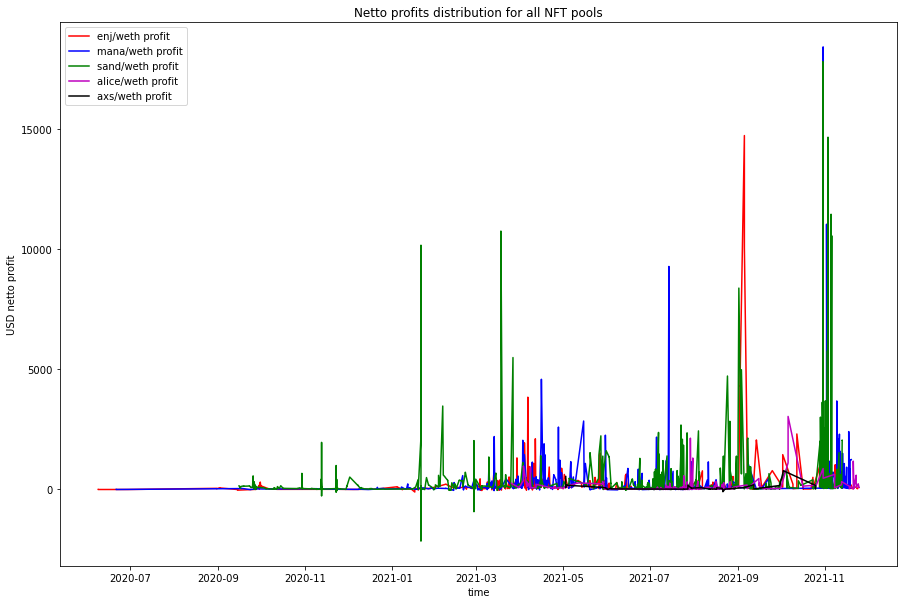

In [20]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(enj_weth_profits_df['timestamp'], enj_weth_profits_df['netto_profit'], color='r', label='enj/weth profit')
ax.plot(mana_weth_profits_df['timestamp'], mana_weth_profits_df['netto_profit'], color='b', label='mana/weth profit')
ax.plot(sand_weth_profits_df['timestamp'], sand_weth_profits_df['netto_profit'], color='g', label='sand/weth profit')
ax.plot(alice_weth_profits_df['timestamp'], alice_weth_profits_df['netto_profit'], color='m', label='alice/weth profit')
ax.plot(axs_weth_profits_df['timestamp'], axs_weth_profits_df['netto_profit'], color='black', label='axs/weth profit')
ax.set_xlabel('time')
ax.set_ylabel('USD netto profit')
ax.set_title('Netto profits distribution for all NFT pools')
ax.legend()
plt.show()

## Meme pools

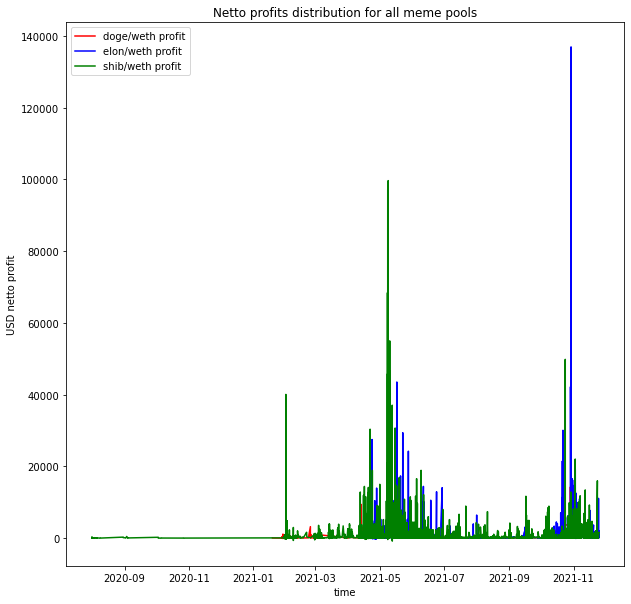

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(doge_weth_profits_df['timestamp'], doge_weth_profits_df['netto_profit'], color='r', label='doge/weth profit')
ax.plot(elon_weth_profits_df['timestamp'], elon_weth_profits_df['netto_profit'], color='b', label='elon/weth profit')
ax.plot(shib_weth_profits_df['timestamp'], shib_weth_profits_df['netto_profit'], color='g', label='shib/weth profit')
ax.set_xlabel('time')
ax.set_ylabel('USD netto profit')
ax.set_title('Netto profits distribution for all meme pools')
ax.legend()
plt.show()

## Classic pools

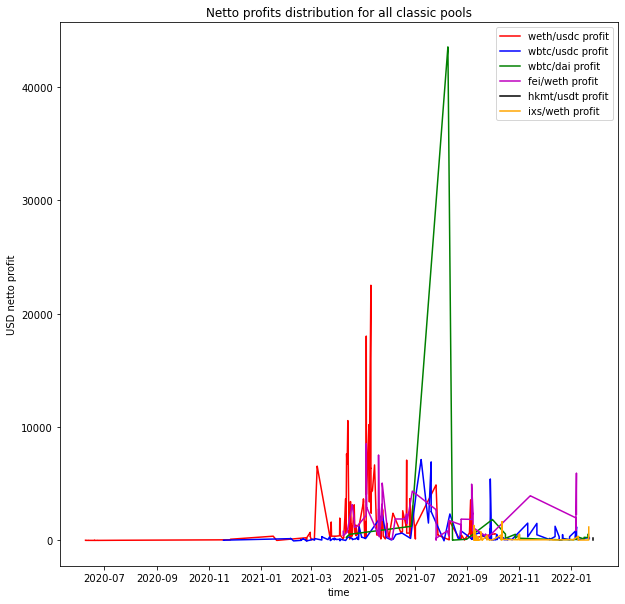

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(weth_usdc_profits_df['timestamp'], weth_usdc_profits_df['netto_profit'], color='r', label='weth/usdc profit')
ax.plot(wbtc_usdc_profits_df['timestamp'], wbtc_usdc_profits_df['netto_profit'], color='b', label='wbtc/usdc profit')
ax.plot(wbtc_dai_profits_df['timestamp'], wbtc_dai_profits_df['netto_profit'], color='g', label='wbtc/dai profit')
ax.plot(fei_weth_profits_df['timestamp'], fei_weth_profits_df['netto_profit'], color='m', label='fei/weth profit')
ax.plot(hkmt_usdt_profits_df['timestamp'], hkmt_usdt_profits_df['netto_profit'], color='black', label='hkmt/usdt profit')
ax.plot(ixs_weth_profits_df['timestamp'], ixs_weth_profits_df['netto_profit'], color='orange', label='ixs/weth profit')
ax.set_xlabel('time')
ax.set_ylabel('USD netto profit')
ax.set_title('Netto profits distribution for all classic pools')
ax.legend()
plt.show()

## Shares STO pools

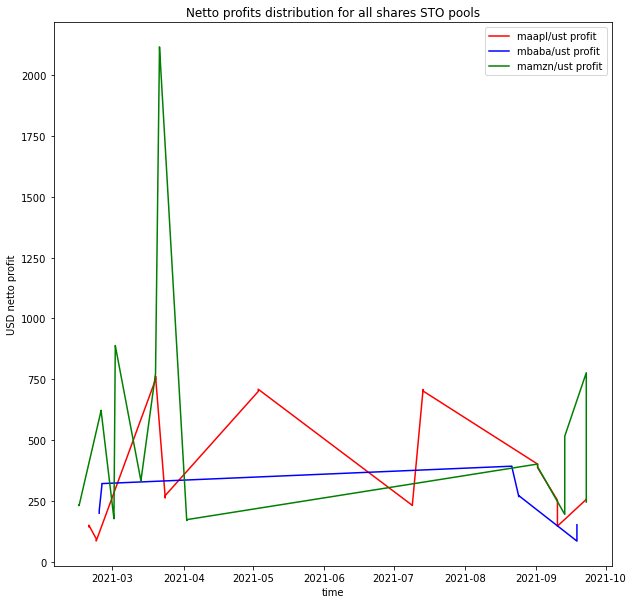

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(maapl_ust_profits_df['timestamp'], maapl_ust_profits_df['netto_profit'], color='r', label='maapl/ust profit')
ax.plot(mbaba_ust_profits_df['timestamp'], mbaba_ust_profits_df['netto_profit'], color='b', label='mbaba/ust profit')
ax.plot(mamzn_ust_profits_df['timestamp'], mamzn_ust_profits_df['netto_profit'], color='g', label='mamzn/ust profit')
ax.set_xlabel('time')
ax.set_ylabel('USD netto profit')
ax.set_title('Netto profits distribution for all shares STO pools')
ax.legend()
plt.show()

## Non shares STO pools

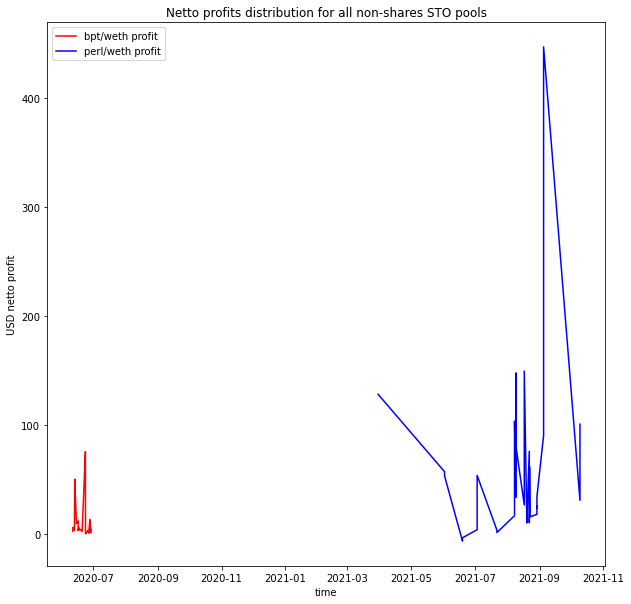

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(bpt_weth_profits_df['timestamp'], bpt_weth_profits_df['netto_profit'], color='r', label='bpt/weth profit')
ax.plot(perl_weth_profits_df['timestamp'], perl_weth_profits_df['netto_profit'], color='b', label='perl/weth profit')
ax.set_xlabel('time')
ax.set_ylabel('USD netto profit')
ax.set_title('Netto profits distribution for all non-shares STO pools')
ax.legend()
plt.show()

# Plotting gas costs distributions by each category

## NFT pools

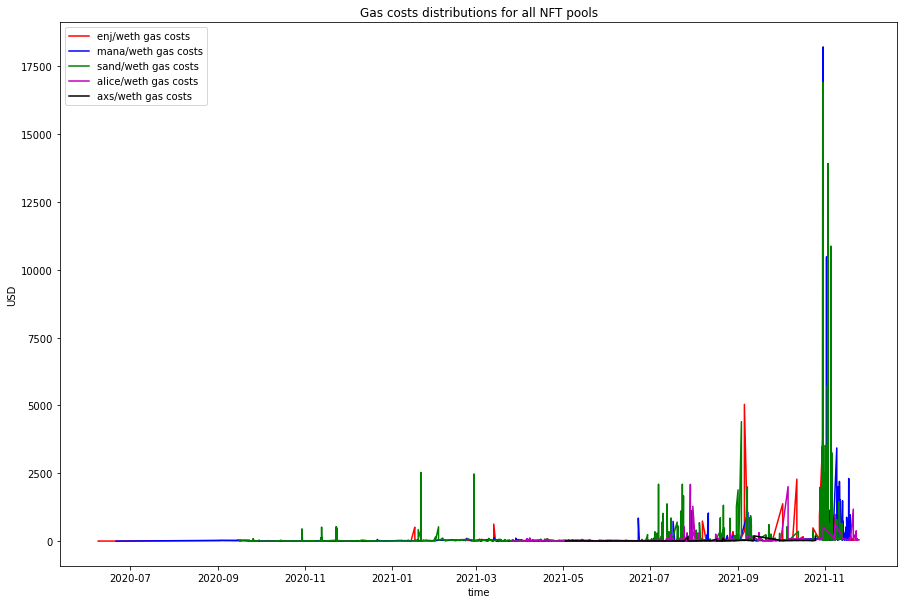

In [21]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(enj_weth_profits_df['timestamp'], enj_weth_profits_df['gas_costs_usd'], color='r', label='enj/weth gas costs')
ax.plot(mana_weth_profits_df['timestamp'], mana_weth_profits_df['gas_costs_usd'], color='b', label='mana/weth gas costs')
ax.plot(sand_weth_profits_df['timestamp'], sand_weth_profits_df['gas_costs_usd'], color='g', label='sand/weth gas costs')
ax.plot(alice_weth_profits_df['timestamp'], alice_weth_profits_df['gas_costs_usd'], color='m', label='alice/weth gas costs')
ax.plot(axs_weth_profits_df['timestamp'], axs_weth_profits_df['gas_costs_usd'], color='black', label='axs/weth gas costs')
ax.set_xlabel('time')
ax.set_ylabel('USD')
ax.set_title('Gas costs distributions for all NFT pools')
ax.legend()
plt.show()

## Meme pools

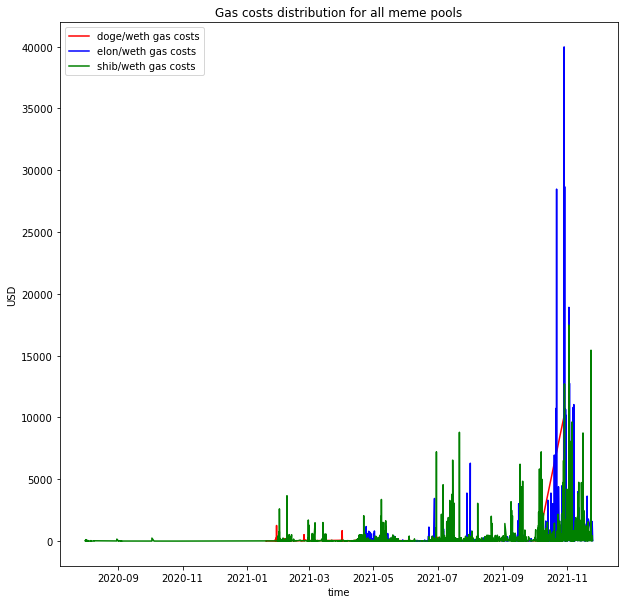

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(doge_weth_profits_df['timestamp'], doge_weth_profits_df['gas_costs_usd'], color='r', label='doge/weth gas costs')
ax.plot(elon_weth_profits_df['timestamp'], elon_weth_profits_df['gas_costs_usd'], color='b', label='elon/weth gas costs')
ax.plot(shib_weth_profits_df['timestamp'], shib_weth_profits_df['gas_costs_usd'], color='g', label='shib/weth gas costs')
ax.set_xlabel('time')
ax.set_ylabel('USD')
ax.set_title('Gas costs distribution for all meme pools')
ax.legend()
plt.show()

## Classic pools

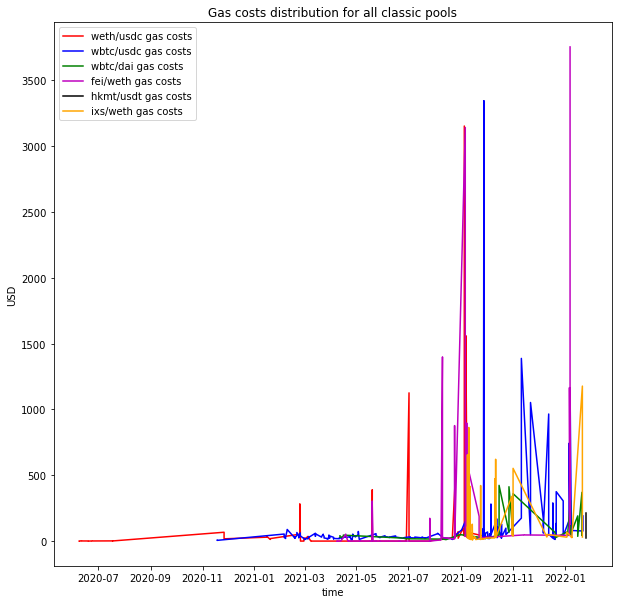

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(weth_usdc_profits_df['timestamp'], weth_usdc_profits_df['gas_costs_usd'], color='r', label='weth/usdc gas costs')
ax.plot(wbtc_usdc_profits_df['timestamp'], wbtc_usdc_profits_df['gas_costs_usd'], color='b', label='wbtc/usdc gas costs')
ax.plot(wbtc_dai_profits_df['timestamp'], wbtc_dai_profits_df['gas_costs_usd'], color='g', label='wbtc/dai gas costs')
ax.plot(fei_weth_profits_df['timestamp'], fei_weth_profits_df['gas_costs_usd'], color='m', label='fei/weth gas costs')
ax.plot(hkmt_usdt_profits_df['timestamp'], hkmt_usdt_profits_df['gas_costs_usd'], color='black', label='hkmt/usdt gas costs')
ax.plot(ixs_weth_profits_df['timestamp'], ixs_weth_profits_df['gas_costs_usd'], color='orange', label='ixs/weth gas costs')
ax.set_xlabel('time')
ax.set_ylabel('USD')
ax.set_title('Gas costs distribution for all classic pools')
ax.legend()
plt.show()

## Shares STO pools

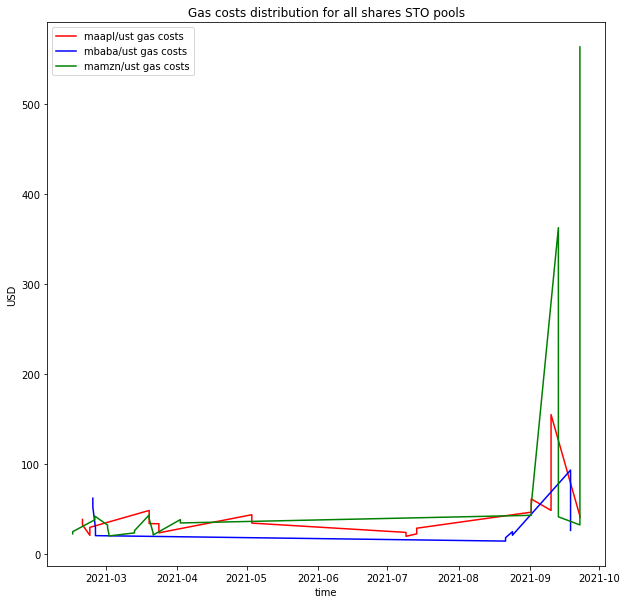

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(maapl_ust_profits_df['timestamp'], maapl_ust_profits_df['gas_costs_usd'], color='r', label='maapl/ust gas costs')
ax.plot(mbaba_ust_profits_df['timestamp'], mbaba_ust_profits_df['gas_costs_usd'], color='b', label='mbaba/ust gas costs')
ax.plot(mamzn_ust_profits_df['timestamp'], mamzn_ust_profits_df['gas_costs_usd'], color='g', label='mamzn/ust gas costs')
ax.set_xlabel('time')
ax.set_ylabel('USD')
ax.set_title('Gas costs distribution for all shares STO pools')
ax.legend()
plt.show()

## Non shares STO pools

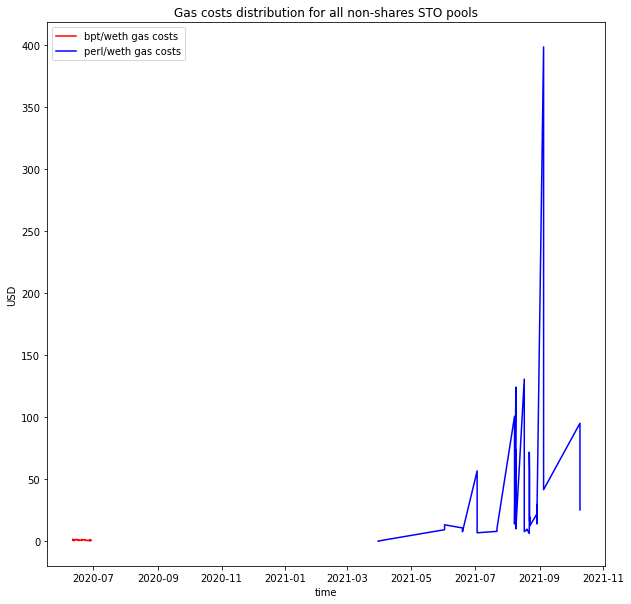

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(bpt_weth_profits_df['timestamp'], bpt_weth_profits_df['gas_costs_usd'], color='r', label='bpt/weth gas costs')
ax.plot(perl_weth_profits_df['timestamp'], perl_weth_profits_df['gas_costs_usd'], color='b', label='perl/weth gas costs')
ax.set_xlabel('time')
ax.set_ylabel('USD')
ax.set_title('Gas costs distribution for all non-shares STO pools')
ax.legend()
plt.show()